This repository will use the public dataset of UCI Machine Learning Repository. 
URL is https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease

The objective of this projects is to try to outperform current papers and work with the same repository.

 - Paper to outperform: 10.1109/CONFLUENCE.2016.7508132 
 - Works are available in https://www.kaggle.com/mansoordaku/ckdiseasekaggle

Also after cleaning the data set of missing values and other inconsistences, the resultant data set will be upload to Kaggle

**Outline of works**

 1. Exploratory Data Analysis (EDA)
 
    1. Load data and summarizes
    2. Tables and DataViz
    3. Data missing handle
    4. Hypothesis testing 
    
     
 2. Comparison different Classifiers (LogReg, SVM, DT, Bagging, RandomForest, KNN or ANN)
 
 
 3. Comparsion to aforementioned paper and other devs in kaggle
 
 
 4. Interpretability by showing features of importance in the oucomes

To structure this work and followed a proper methodology that saves to miss any important steps in delivering the outcomes, we will follow the IBM foundational data science methodology available here : [https://www.ibmbigdatahub.com/blog/why-we-need-methodology-data-science](https://www.ibmbigdatahub.com/blog/why-we-need-methodology-data-science) ; with the following steps:

 1. Business understanding
 2. Analytical approach
 3. Data requirements
 4. Data collection
 5. Data understanding
 6. Data preparation
 7. Modelling
 8. Evaluation
 9. Deploying 
 10. Feedback 

Due to the academic purpose of the work based on an existing datasource, some of the steps will be lightly covered.

This notebook shows a pipeline with two main phases: the data preparation phase and modelling phase. **Bla Bla Bla**

## 1. Business understanding

Here the word business might not be totally adequate since we are not trying to get revenue from anything, however, the subtle idea here is to define the problem to solve. So, what we pursue from this work is to solve the following problem: **Predict  chronic kidney disease (CKD) on individuals**

## 2. Analytical approach

Since we are trying to predict the onset of a disease CKD, the key word is to predict if a certain indidivual considering a set of feaures *has or has not* CKD. Thus we are in front of a **classification problem** with a target that takes a binary value. Therefore, from now on we will work in a classification model.

## 3. Data requirements

Data needed to peform this work will consist of a set of features relative to patients and a target value that says Yes/No the patient suffers from CKD. The set of feautures conrrespond to one patient withouth being referred to a certain timestamp. So the classification model will predict CKD disease in terms of "absolute" measures

In [40]:


#CKD_pipeline.py file aimed at reproduce performance of CKD_script through pipeline
#to improve modularity

## All necessary modules as well as different functions that will be used in this work are explicit here.
#import all neccesary modules
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

#import modules created 
import my_utils
import missing_val_imput
import feature_select
import preprocessing
import adhoc_transf
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

#Classifier models to use
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score




## 4. Data collection

This repository will use the public dataset of UCI Machine Learning Repository. URL is https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease

In [41]:
#importing file into a pandas dataframe# As being unable to extract data from it original source, the csv file is downloaded from
#https://www.kaggle.com/mansoordaku/ckdisease
path_data=r'C:\Users\k5000751\OneDrive - Epedu O365\SeAMK\GitHub\Chronic_Kidney_Disease\Chronic_Kidney_Disease\kidney_disease.csv'

df=pd.read_csv(path_data)

## 5. Data understanding (Exploratory Data Analysis)


The data understanding phase will consist tackle the Exploratory Data Analysis (EDA) approach composed of the following points:
 
   1. Summarizes data
   2. Tables and DataViz
   3. Data missing handle
   4. Hypothesis testing 

Other approach taken from IBM Data Science course on Coursera is to follow these steprs
1. Summarize data
2. Bivariable correlation
3. Histograms
    

In [42]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [43]:
# Lets see summary of data
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [44]:
df['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

The features of the dataset seems to be well defined as well as the target features is explicitly name as **"classification"**. The values of this colum are *ckd*: the patient has ckd; and *notckd*: the patient has not ckd

In [45]:
#Set column id as index
df.set_index('id', inplace=True)

In [46]:
#Functions from my_utils.py for having custom process to see information about data
#Count values of every feature of the df
def df_values(df):
    for i in range(0, len(df.columns)):
        print("*****start of feature ", df.columns[i], "*************************")
        print (df.iloc[:,i].value_counts())       
        print ("*****end of feature ", df.columns[i], "************************** \n")

#print info() method with an extra column of % of non-null values
def info_adhoc(df):
    d=(df.count()/len(df))*100
    df_info=pd.DataFrame(data=d, columns=['% non-null values'])
    df_info['non-null values']=df.count()
    df_info['dtype']=df.dtypes
    return df_info

In [47]:
#Looking at describe table we can see that there are some missing features that apparently have numerical values. Let's see the
#type of these features, apart from the proportion of non-null values
my_utils.info_adhoc(df)

,% non-null values,non-null values,dtype
age,97.75,391,float64
bp,97.00,388,float64
sg,88.25,353,float64
al,88.50,354,float64
su,87.75,351,float64
rbc,62.00,248,object
pc,83.75,335,object
pcc,99.00,396,object
ba,99.00,396,object
bgr,89.00,356,float64


In [48]:
#As seen above, there are some strange caracters in pcv feature, therefore we will explore every features' value to homogeneize it.
my_utils.df_values(df)

*****start of feature  age *************************
60.0    19
65.0    17
48.0    12
50.0    12
55.0    12
        ..
14.0     1
81.0     1
22.0     1
26.0     1
79.0     1
Name: age, Length: 76, dtype: int64
*****end of feature  age ************************** 

*****start of feature  bp *************************
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
120.0      1
180.0      1
140.0      1
Name: bp, dtype: int64
*****end of feature  bp ************************** 

*****start of feature  sg *************************
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64
*****end of feature  sg ************************** 

*****start of feature  al *************************
0.0    199
1.0     44
3.0     43
2.0     43
4.0     24
5.0      1
Name: al, dtype: int64
*****end of feature  al ************************** 

*****start of feature  su *************************
0.0    290
2.0     18
3.0     14
1.0   

C:\Users\k5000751\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\k5000751\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\k5000751\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\k5000751\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\k5000751\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\k5000751\Anaconda3\lib\site-packages\seaborn\distributions.py:283:

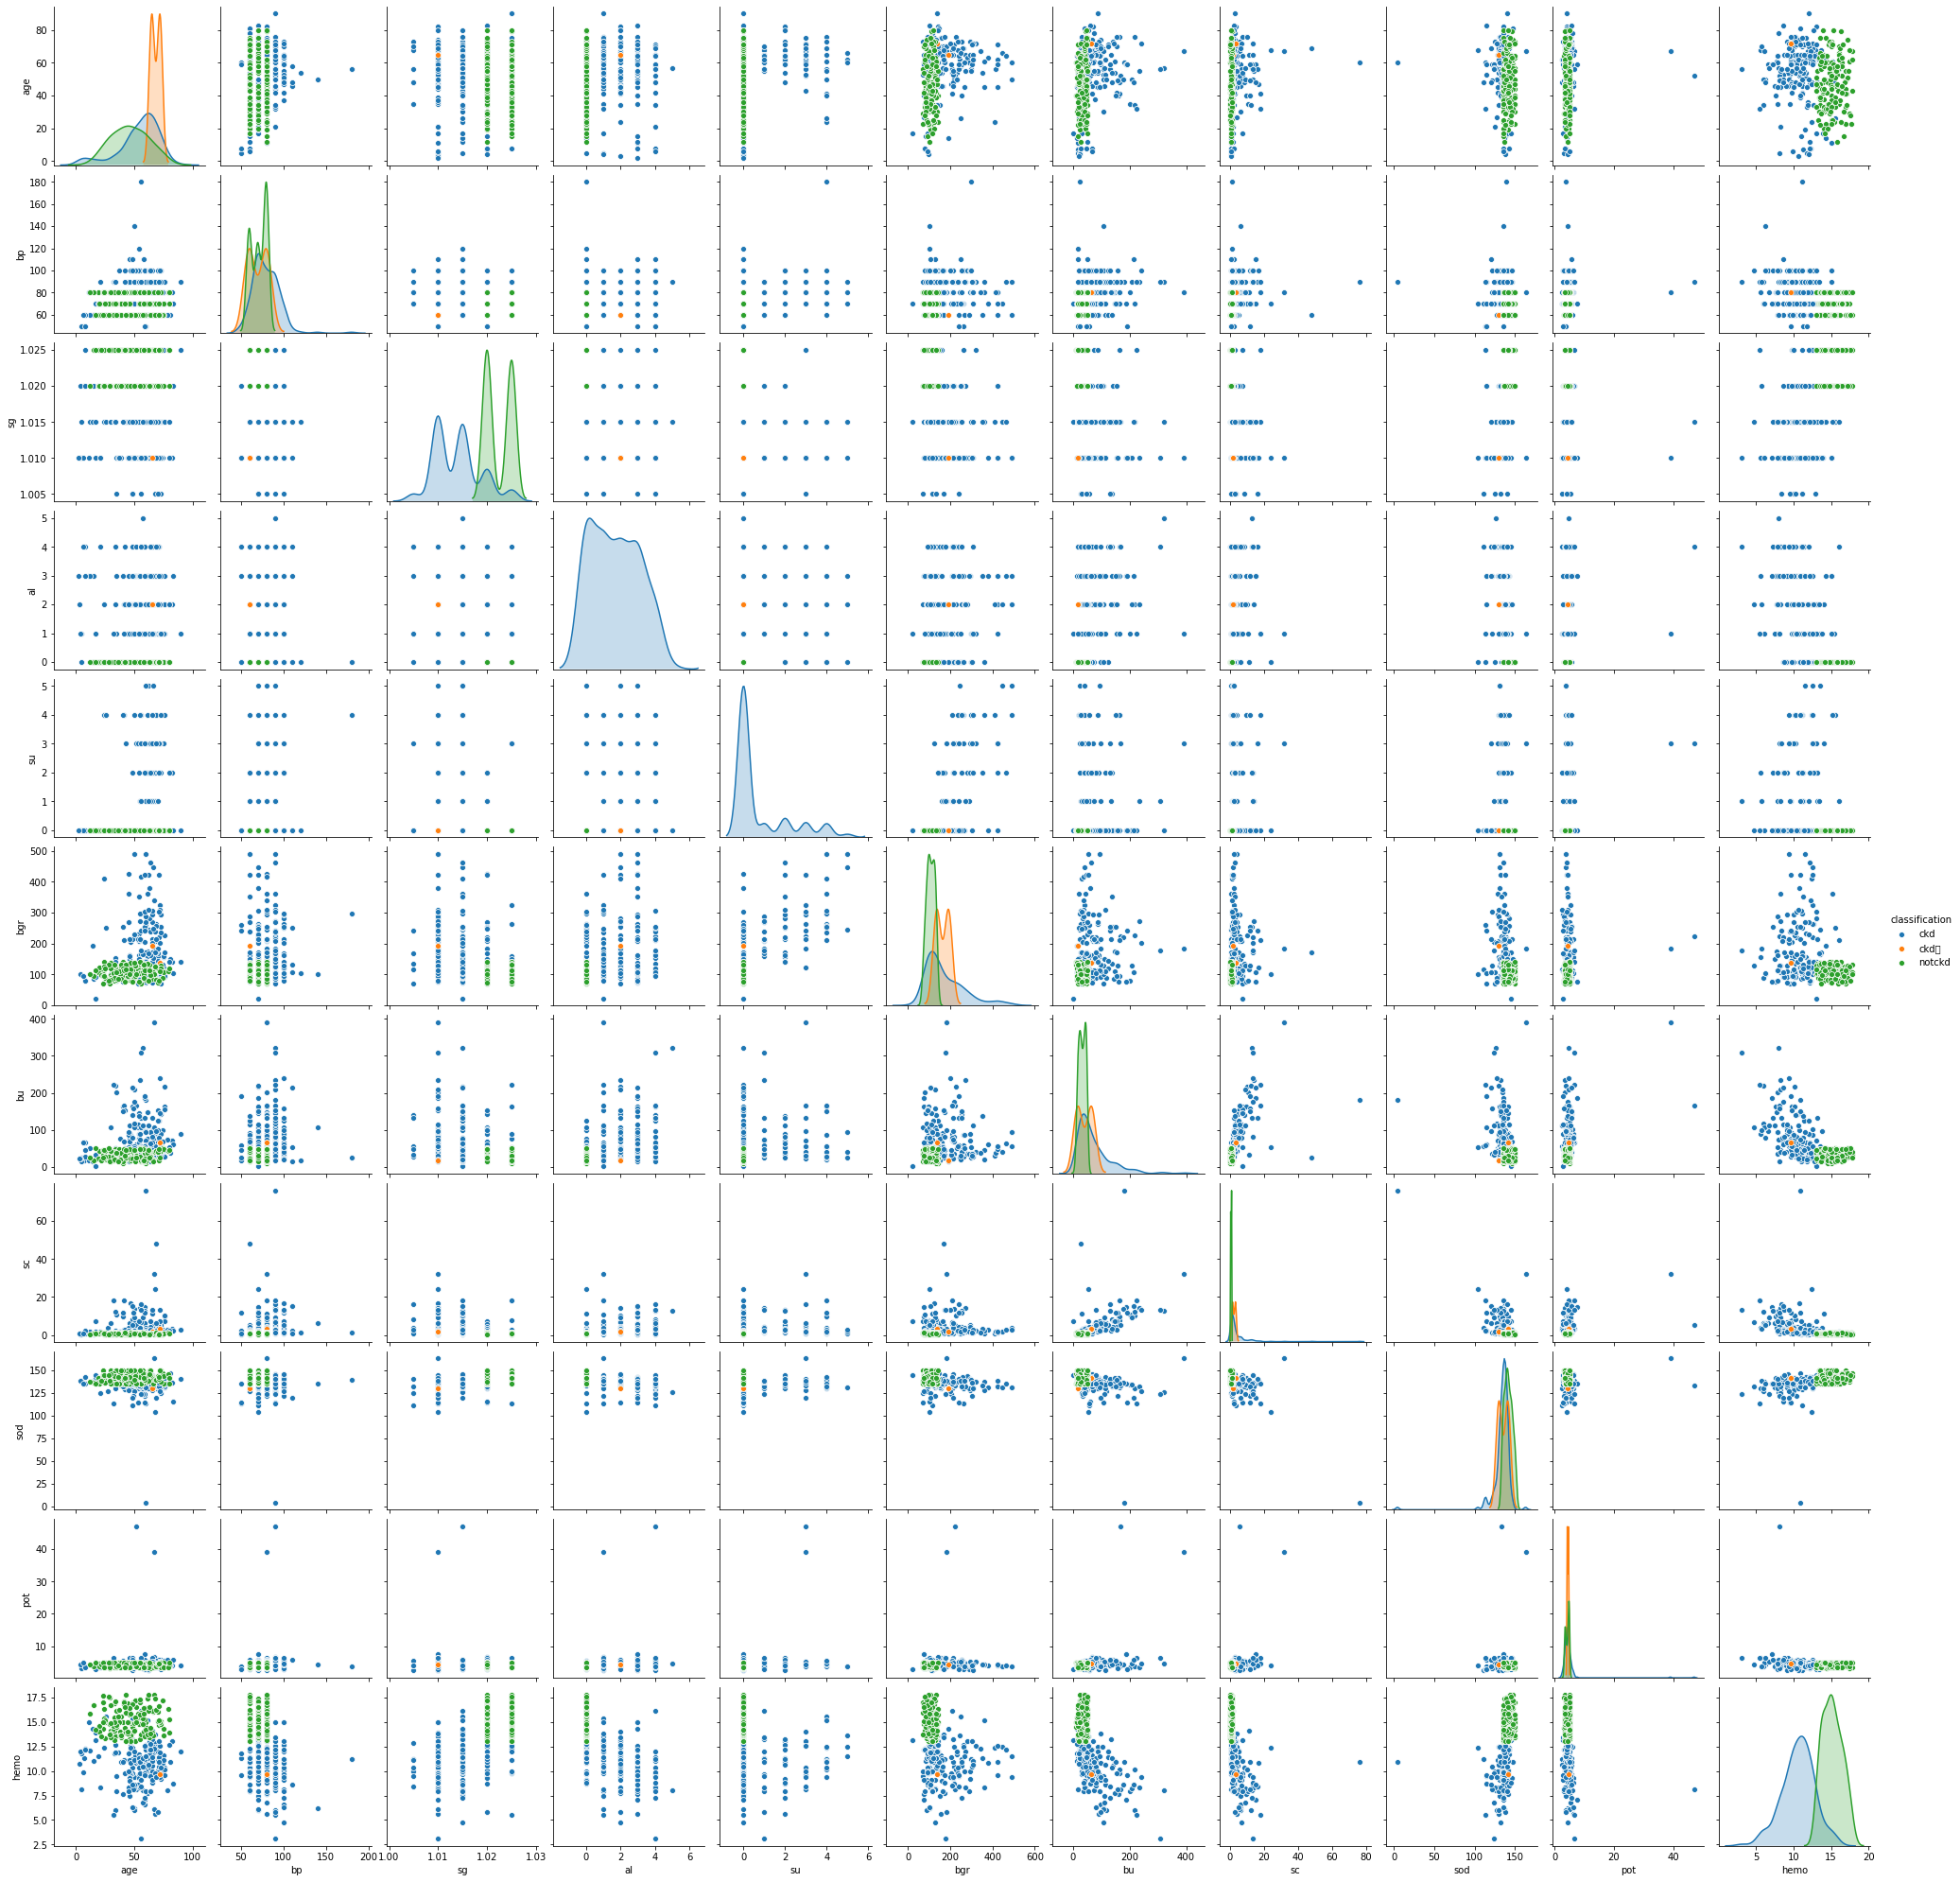

In [49]:
#Let's visualized a scatter matrix of numerical variables. We can progress here
sn.pairplot(df,hue='classification')

## 6. Data preparation
The steps taken here are:
 
   1. Train-Test splitting
   2. Misspelling correction and encoding target feature
   3. Pipeline for data preparation

### 6.1Train-Test splitting


In [50]:
#Before starting to clean data, lets split train set and data set

train_set,test_set=train_test_split(df, test_size=0.2, random_state=42)


from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["classification"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
    
train_set['classification'].value_counts()
test_set['classification'].value_counts()
    

strat_train_set['classification'].value_counts()
strat_test_set['classification'].value_counts()

train_set_copy=train_set.copy()
test_set_copy=test_set.copy()

X_train=train_set_copy.drop('classification',axis=1)
y_train=train_set_copy['classification'].copy()

X_test=test_set_copy.drop('classification',axis=1)
y_test=test_set_copy['classification'].copy()

### 6.2 Misspelling correction and encoding target feature

In [51]:
#Correct any misspelling correction in y_train
def misspellingCorrector(df):
    df.iloc[:] = df.iloc[:].str.replace(r'\t','')
    df.iloc[:] = df.iloc[:].str.replace(r' ','')
    return df

y_train=misspellingCorrector(y_train)

label_enc=LabelEncoder()
y_train=label_enc.fit_transform(y_train)

### 6.3 Pipeline for data preparation

In [52]:
#Numerical features and category features are identified for further process
numerical_features=['age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']
category_features= ['sg','al','su','rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [53]:
######
# Functions that performs adhoc transformatin for adapting feature values 
#to improve processing
######

#Class for correcting misspelling of features and target columns
class misspellingTransformer(BaseEstimator, TransformerMixin):
    def misspelling (self,df):
    #Some fetures content seems to have the character \t.
    #Let's remove such character for the sake of consistency
        print('\n>>>>>>>>Calling misspelling')              
        for i in range(0, len(df.columns)):            
            if df.dtypes[i]==np.object:
                df.iloc[:,i] = df.iloc[:,i].str.replace(r'\t','')
                df.iloc[:,i] = df.iloc[:,i].str.replace(r' ','')
        return df
    
    def __init__(self):
        print('\n>>>>>>>>Calling init() from misspelling')
            
    def fit(self, X, y=None):
        print('\n>>>>>>>>Calling fit() from misspelling')
        return self
    
    def transform(self,X,y=None):
        print('\n>>>>>>>>Calling transform() from misspelling')        
        df=self.misspelling(X)       
        return df
    
    def fit_transform(self, X, y=None,):
        return self.fit(X, y).transform(X, y)
    
#Class to be included in TransfromColumn pipeline for casting numeric columns to float64 
class Numeric_Cast_Column(BaseEstimator, TransformerMixin):  
    def __init__(self):
        print('\n>>>>>>>>Calling init() from Numeric_Cast_Column')        
    def fit(self, X,y=None):
        #print('inside fit Numeric_Cast, tuple leng', len(X))
        print('\n>>>>>>>>Calling fit() from Numeric_Cast_Column')        
        return self
    
    def transform(self, X,y=None):    
        #print ('Content of X', X)
        print('\n>>>>>>>>Calling transform() from Numeric_Cast_Column')        
        for i in range(X.shape[1]):
            #df[i]=pd.to_numeric(df[i],errors='coerce')
            X.iloc[:,i]=pd.to_numeric(X.iloc[:,i],errors='coerce')        
        return X    
    def fit_transform(self, X,y=None):    
        return self.fit(X, y).transform(X, y)

 #Class to be included in TransfromColumn pipeline for casting numeric columns to float64 
class Category_Cast_Column(BaseEstimator, TransformerMixin):  
    def __init__(self):
        print('\n>>>>>>>>Calling init() from Category_Cast_Column')        
    def fit(self, X,y=None):
        #print('inside fit Numeric_Cast, tuple leng', len(X))
        print('\n>>>>>>>>Calling fit() from Category_Cast_Column')        
        return self
    
    def transform(self, X,y=None):    
        #print ('Content of X', X)
        print('\n>>>>>>>>Calling transform() from Category_Cast_Column')        
        for i in range(X.shape[1]):
            #df[i]=pd.to_numeric(df[i],errors='coerce')
            X.iloc[:,i]=X.iloc[:,i].astype('category')
        return X    
    def fit_transform(self, X,y=None):    
        return self.fit(X, y).transform(X, y)

#Class for downcasting last category value of features 'al' and 'sg'
class CastDown(BaseEstimator, TransformerMixin):
    def __init__(self):
        print('\n>>>>>>>>Calling init() from CastDown')
    
    def fit(self,X, y=None):
        print('\n>>>>>>>>Calling fit() from CastDown')
        return self
    
    def transform(self, X, y=None):
        print('\n>>>>>>>>Calling transform() from CastDown')
        X[:,1][X[:,1]==5]=4
        X[:,2][X[:,2]==5]=4
        return X
   

In [54]:
######
##Functions to handle missing values in features
######

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

#Class that handle imputation of NaN values in numeric features
class Numeric_Imputer(BaseEstimator, TransformerMixin):
    #Different modes of imputation depending on strategy parameter
    #median:simple imputation by considering median of feature values
    #mean: simple imputation by considering mean of feature values
    #iterative: multiple imputation by using IterativeImputer
    #knn: KNN imputation
    def __init__(self,strategy='median'):
        print('\n>>>>>>>>Calling init() from Numeric_Imputer')
        self.strategy=strategy
        
        if self.strategy=='median':
            self.num_imputer=SimpleImputer(strategy=self.strategy)
        if self.strategy=='mean':
            self.num_imputer=SimpleImputer(strategy=self.strategy)
        if self.strategy=='iterative':
            self.num_imputer=IterativeImputer(random_state=0, sample_posterior='True')
        if self.strategy=='knn':
            self.num_imputer=KNNImputer()
    
    def fit(self,X,y=None):
        print('\n>>>>>>>>Calling fit() from Numeric_Imputer')
        self.num_imputer.fit(X,y)
        return self
    
    def transform(self,X,y=None):
        print('\n>>>>>>>>Calling transform() from Numeric_Imputer')
        X=self.num_imputer.transform(X)
        return X

#Class that handle imputation of NaN values in category features    
class Category_Imputer(BaseEstimator, TransformerMixin):
    #Different modes of imputation depending on strategy parameter
    #most_frequent:simple imputation by considering most frequent feature's value
    #constant: simple imputation by adding new category unknown to NaN values
    
    def __init__(self,strategy='most_frequent'):
        print('\n>>>>>>>>Calling init() from Category_Imputer')
        self.strategy=strategy
        if self.strategy=='most_frequent':
            self.cat_imputer=SimpleImputer(strategy=self.strategy)
        if self.strategy=='constant':
            self.cat_imputer=SimpleImputer(strategy=self.strategy,fill_value='unknown')
        
    
    def fit(self,X,y=None):
        print('\n>>>>>>>>Calling fit() from Category_Imputer')
        self.cat_imputer.fit(X,y)
        return self
    
    def transform(self,X,y=None):
        print('\n>>>>>>>>Calling transform() from Category_Imputer')
        X=self.cat_imputer.transform(X)
        return X


In [55]:
######
##Functions to perform different methods of feature selection
######
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR 
from sklearn.linear_model import RidgeCV, LassoCV

#Wrapper transformer for LassoCV feature selection
class LassoCV_FeatSel(BaseEstimator, TransformerMixin):
    def __init__(self):
        print('\n>>>>>>>>Calling init() from LassoCV_FeatSel')
        self.reg=LassoCV()
    
    def fit(self,X,y=None):
        print('\n>>>>>>>>Calling fit() from LassoCV_FeatSel')
        self.reg.fit(X,y)
        return self
        
    def transform(self,X):
        print('\n>>>>>>>>Calling transform() from LassoCV_FeatSel')
        coef = pd.Series(self.reg.coef_, index = X.columns)
        feat_sel=coef!=0        
        X_pruned=X[feat_sel.index[feat_sel]]
        return X_pruned
    
#Wrapper transformer for RidgeCV feature selection
class RidgeCV_FeatSel(BaseEstimator, TransformerMixin):
    def __init__(self):
        print('\n>>>>>>>>Calling init() from RidgeCV_FeatSel')
        self.reg=RidgeCV()
        
    def fit(self,X,y=None):
        print('\n>>>>>>>>Calling fit() from RidgeCV_FeatSel')
        self.reg.fit(X,y)
        return self
        
    def transform(self,X):
        print('\n>>>>>>>>Calling transform() from RidgeCV_FeatSel')
        coef = pd.Series(reg.coef_, index = X.columns)
        feat_sel=coef>=0
        X_pruned=X[feat_sel.index[feat_sel]]        
        return X_pruned

#Wrapper transformer for Backward Elimination feature selection
class Backward_Elimination (BaseEstimator, TransformerMixin):
    def __init__(self):
        print('\n>>>>>>>>Calling init() from Backward_Elimination')
        
    def fit(self,X,y=None):
        print('\n>>>>>>>>Calling fit() from Backward_Elimination')
        cols = list(X.columns)
        pmax = 1
        while (len(cols)>0):
            p= []
            X_1 = X[cols]
            X_1 = sm.add_constant(X_1)
            model = sm.OLS(y,X_1).fit()
            p = pd.Series(model.pvalues.values[1:],index = cols)      
            pmax = max(p)
            feature_with_p_max = p.idxmax()
            if(pmax>0.05):
                cols.remove(feature_with_p_max)
            else:
                break
        self.selected_features_BE = cols
        return self
    
    def transform(self, X):
        print('\n>>>>>>>>Calling transform() from Backward_Elimination')
        X_pruned=X[self.selected_features_BE]
        return X_pruned
    
#Class to run feature selection depending on different strategies
class Feature_Selector(BaseEstimator, TransformerMixin):
    #filter_num: performing ANOVA valid for numeric input and category output
    #filter_cat: performing chi2 valid for category input and category output
    #filter_mutinf:performing mutual information valid for numeric/category input and category output
    #wrapper_RFECV: performing RFECV with two optional regressor LogisticRegression(by defaurl) or SVR valid for numeric/category input and category output
    #wrapper_BackElim:performing Backward Elimination valid for numeric/category input and category output
    #LassoCV: performing LassoCV valid for numeric/category input and category output
    #RidgeCV: performing RidgeCV valid for numeric/category input and category output
    
    #def __init__(self,y_train,strategy='wrapper_RFECV',k_out_features=5, rfe_estimator='LogisticRegression'):       
    def __init__(self,strategy='wrapper_RFECV',k_out_features=5, rfe_estimator='LogisticRegression'):
        print('\n>>>>>>>>Calling init() from Feature_Selector')
        
        #self.y_train=y_train
        self.strategy=strategy
        self.k_out_features=k_out_features
        self.rfe_estimator=rfe_estimator
        
        if self.strategy=='filter_num':
            self.feat_sel=SelectKBest(score_func=f_classif, k=self.k_out_features)
            
        if self.strategy=='filter_cat':
            self.feat_sel=SelectKBest(score_func=chi2, k=self.k_out_features)
            
        if self.strategy=='filter_mutinf':
            self.feat_sel=SelectKBest(score_func=mutual_info_classif, k=self.k_out_features)
            
        if self.strategy=='wrapper_RFECV':
            if self.rfe_estimator=='LogisticRegression':
                self.model=LogisticRegression(solver='lbfgs', max_iter=2000)
            if self.rfe_estimator=='SVR':
                self.model=SVR(kernel='linear')
            self.feat_sel=RFECV(self.model)
        
        if self.strategy=='wrapper_BackElim':
            self.feat_sel=Backward_Elimination()   
        
        if self.strategy=='LassoCV':
            self.feat_sel=LassoCV_FeatSel()
        
        if self.strategy=='RidgeCV':
            self.feat_sel=RidgeCV_FeatSel()
        
        
    def fit(self,X,y=None):
        print('\n>>>>>>>>Calling fit() from Feature_Selector')
        #index=X.index
        self.y_train=y
        print('\n********Inside fit() from Feature_Selector y_train length:', self.y_train.size)        
        print('\n********Calling fit() from Feature_Selector X length: ', X.shape[0])
        
        self.feat_sel.fit(X,self.y_train)
        return self
    
    def transform(self,X,y=None):
        print('\n>>>>>>>>Calling transform() from Feature_Selector')
        X_pruned=self.feat_sel.transform(X)
        return X_pruned

In [56]:
######
##Creation of Pipeline for data preparation 
######


pipeline_numeric_feat= Pipeline([('mispelling',misspellingTransformer()),
                                 ('features_cast',Numeric_Cast_Column()),
                                 ('data_missing',Numeric_Imputer(strategy='median')),
                                 ('features_select',Feature_Selector(strategy='wrapper_RFECV')),
                                 ('scaler', MinMaxScaler())
                        ])

pipeline_category_feat= Pipeline([('mispelling',misspellingTransformer()),
                                 ('features_cast',Category_Cast_Column()),
                                 ('data_missing',Category_Imputer(strategy='most_frequent')),
                                 ('cat_feat_engineering',CastDown()),
                                 ('encoding', OrdinalEncoder()),
                                 ('features_select',Feature_Selector(strategy='wrapper_RFECV'))
                        ])

dataprep_pipe=ColumnTransformer([('numeric_pipe',pipeline_numeric_feat,numerical_features),
                                 ('category_pipe',pipeline_category_feat, category_features)
                                ])


#For testing data_prep pipelines individually
#X_train1=pipeline_numeric_feat.fit_transform(X_train[numerical_features],y_train)
#X_train1=pipeline_category_feat.fit_transform(X_train[category_features],y_train)

#X_train1=dataprep_pipe.fit_transform(X_train,y_train)



>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Numeric_Cast_Column

>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Category_Cast_Column

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling init() from CastDown

>>>>>>>>Calling init() from Feature_Selector


## 7.Modelling and 8. Evaluation

### 7.1 Creation of modelling pipeline

In [57]:
#############################
## Pipeline creation for model
#############################
#Several classifier with Cross validation will be applied
y_test=misspellingCorrector(y_test)

label_enc=LabelEncoder()
y_test=label_enc.fit_transform(y_test)

sgd_clf=SGDClassifier()
logreg_clf=LogisticRegression()
linsvc_clf=LinearSVC()
svc_clf=SVC()
dectree_clf=DecisionTreeClassifier()
rndforest_clf=RandomForestClassifier()
#
print ('Creating the full Pipeline')

estimator=rndforest_clf
full_pipeline=Pipeline([('data_prep',dataprep_pipe),
                        ('model',rndforest_clf)])

full_pipeline.fit(X_train,y_train)

Creating the full Pipeline

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Numeric_Cast_Column

>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling fit() from misspelling

>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling fit() from Numeric_Cast_Column

>>>>>>>>Calling transform() from Numeric_Cast_Column

>>>>>>>>Calling fit() from Numeric_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling fit() from Feature_Selector

********Inside fit() from Feature_Selector y_train length: 320

********Calling fit() from Feature_Selector X length:  320

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Category_Cast_Column

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling init() from CastDown

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling fit() from misspelling


Pipeline(steps=[('data_prep',
                 ColumnTransformer(transformers=[('numeric_pipe',
                                                  Pipeline(steps=[('mispelling',
                                                                   misspellingTransformer()),
                                                                  ('features_cast',
                                                                   Numeric_Cast_Column()),
                                                                  ('data_missing',
                                                                   Numeric_Imputer()),
                                                                  ('features_select',
                                                                   Feature_Selector()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                               

## 8.1 Evaluation  of pipeline modelling

In [58]:
##Apply cross validation with the full_pipeline
cross_val_score(full_pipeline,X_train,y_train, cv=5, scoring='accuracy')


y_pred=full_pipeline.predict(X_test)

print ('Accuracy Score with',estimator,' estimator : ',accuracy_score(y_test, y_pred))
print('F1 Score with',estimator,' estimator : ',f1_score(y_test, y_pred, average='weighted'))
print('Precision Score with',estimator,' estimator : ',precision_score(y_test, y_pred, average='weighted'))
print('Recall Score with',estimator,' estimator : ',recall_score(y_test, y_pred, average='weighted'))
print('ROC_AUC score with',estimator,' estimator ', roc_auc_score(y_test, y_pred))



>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Numeric_Cast_Column

>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Category_Cast_Column

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling init() from CastDown

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Numeric_Cast_Column

>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling fit() from misspelling

>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling fit() from Numeric_Cast_Column

>>>>>>>>Calling transform() from Numeric_Cast_Column

>>>>>>>>Calling fit() from Numeric_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling fit() from Feature_Selector

********Inside fit() from Feature_Selector y_train length: 2


>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Category_Cast_Column

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling init() from CastDown

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling fit() from misspelling

>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling fit() from Category_Cast_Column

>>>>>>>>Calling transform() from Category_Cast_Column

>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling fit() from CastDown

>>>>>>>>Calling transform() from CastDown

>>>>>>>>Calling fit() from Feature_Selector

********Inside fit() from Feature_Selector y_train length: 256

********Calling fit() from Feature_Selector X length:  256

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling transform() from Nume

### 8.2 Applying GridSearchCV to find best parameters

In [59]:
#See the available parameters of full pipeline
full_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'data_prep', 'model', 'data_prep__n_jobs', 'data_prep__remainder', 'data_prep__sparse_threshold', 'data_prep__transformer_weights', 'data_prep__transformers', 'data_prep__verbose', 'data_prep__numeric_pipe', 'data_prep__category_pipe', 'data_prep__numeric_pipe__memory', 'data_prep__numeric_pipe__steps', 'data_prep__numeric_pipe__verbose', 'data_prep__numeric_pipe__mispelling', 'data_prep__numeric_pipe__features_cast', 'data_prep__numeric_pipe__data_missing', 'data_prep__numeric_pipe__features_select', 'data_prep__numeric_pipe__scaler', 'data_prep__numeric_pipe__data_missing__strategy', 'data_prep__numeric_pipe__features_select__k_out_features', 'data_prep__numeric_pipe__features_select__rfe_estimator', 'data_prep__numeric_pipe__features_select__strategy', 'data_prep__numeric_pipe__scaler__copy', 'data_prep__numeric_pipe__scaler__feature_range', 'data_prep__category_pipe__memory', 'data_prep__category_pipe__steps', 'data_prep__category_pipe__verb

In [60]:
#############################
##Application of  GridSearchCV to find best params
#############################

param_grid={'model': [SGDClassifier(),LogisticRegression(),LinearSVC(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()],
            'data_prep__numeric_pipe__data_missing__strategy':['median','mean','iterative','knn'],
            'data_prep__numeric_pipe__features_select__k_out_features': [1,2,3,4,5,6,7,8,9,10,11],
            'data_prep__numeric_pipe__features_select__rfe_estimator':['LogisticRegression','SVR'],
            'data_prep__numeric_pipe__features_select__strategy':['filter_num','filter_mutinf','wrapper_RFECV','wrapper_BackElim','LassoCV','RidgeCV'] ,
            'data_prep__category_pipe__data_missing__strategy': ['most_frequent','constant'],
            'data_prep__category_pipe__features_select__k_out_features': [1,2,3,4,5,6,7,8,9,10,11,12,13],
            'data_prep__category_pipe__features_select__rfe_estimator':['LogisticRegression','SVR'],
            'data_prep__category_pipe__features_select__strategy': ['filter_cat','filter_mutinf','wrapper_RFECV','wrapper_BackElim','LassoCV','RidgeCV'],
    }

from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(full_pipeline,param_grid, cv=5)
clf.fit(X_train,y_train)



>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Numeric_Cast_Column

>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Category_Cast_Column

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling init() from CastDown

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Numeric_Cast_Column

>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Category_Cast_Column

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling init() from CastDown

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Numeric_Cast_Column

>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Callin


>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling fit() from CastDown

>>>>>>>>Calling transform() from CastDown

>>>>>>>>Calling fit() from Feature_Selector

********Inside fit() from Feature_Selector y_train length: 256

********Calling fit() from Feature_Selector X length:  256

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling transform() from Numeric_Cast_Column

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling transform() from Category_Cast_Column

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from CastDown

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Numeric_Cast_Column

>>>>>>>>


>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from CastDown

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Numeric_Cast_Column

>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Category_Cast_Column

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling init() from CastDown

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Numeric_Cast_Column

>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling fit() from misspelling

>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling fit() from Numeric_Cast_Column

>>>>>>>>Calling transform() from Numeric_Cast_Column

>>>>>>>>Calling fit() from Numeric_Imputer

>>>>>>>>Ca


>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling fit() from CastDown

>>>>>>>>Calling transform() from CastDown

>>>>>>>>Calling fit() from Feature_Selector

********Inside fit() from Feature_Selector y_train length: 256

********Calling fit() from Feature_Selector X length:  256

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling transform() from Numeric_Cast_Column

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling transform() from Category_Cast_Column

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from CastDown

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Numeric_Cast_Column

>>>>>>>>


>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from CastDown

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Numeric_Cast_Column

>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Category_Cast_Column

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling init() from CastDown

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Numeric_Cast_Column

>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling fit() from misspelling

>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling fit() from Numeric_Cast_Column

>>>>>>>>Calling transform() from Numeric_Cast_Column

>>>>>>>>Calling fit() from Numeric_Imputer

>>>>>>>>Ca


>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling fit() from CastDown

>>>>>>>>Calling transform() from CastDown

>>>>>>>>Calling fit() from Feature_Selector

********Inside fit() from Feature_Selector y_train length: 256

********Calling fit() from Feature_Selector X length:  256

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling transform() from Numeric_Cast_Column

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling transform() from Category_Cast_Column

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from CastDown

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Numeric_Cast_Column

>>>>>>>>

>>>>>>>>Calling fit() from Numeric_Cast_Column

>>>>>>>>Calling transform() from Numeric_Cast_Column

>>>>>>>>Calling fit() from Numeric_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling fit() from Feature_Selector

********Inside fit() from Feature_Selector y_train length: 256

********Calling fit() from Feature_Selector X length:  256

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Category_Cast_Column

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling init() from CastDown

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling fit() from misspelling

>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling fit() from Category_Cast_Column

>>>>>>>>Calling transform() from Category_Cast_Column

>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling fit() from CastDown

>>>>>>>>Cal


>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling transform() from Numeric_Cast_Column

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling transform() from Category_Cast_Column

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from CastDown

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Numeric_Cast_Column

>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Category_Cast_Column

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling init() from CastDown

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Numeric_Cast_Column

>>


>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling fit() from CastDown

>>>>>>>>Calling transform() from CastDown

>>>>>>>>Calling fit() from Feature_Selector

********Inside fit() from Feature_Selector y_train length: 256

********Calling fit() from Feature_Selector X length:  256

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling transform() from Numeric_Cast_Column

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling transform() from Category_Cast_Column

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from CastDown

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Numeric_Cast_Column

>>>>>>>>


>>>>>>>>Calling fit() from Numeric_Imputer

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling fit() from Feature_Selector

********Inside fit() from Feature_Selector y_train length: 256

********Calling fit() from Feature_Selector X length:  256

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Category_Cast_Column

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling init() from CastDown

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling fit() from misspelling

>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling fit() from Category_Cast_Column

>>>>>>>>Calling transform() from Category_Cast_Column

>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling fit() from CastDown

>>>>>>>>Calling transform() from CastDown

>>>>>>>>Calling fit() from Feature_Selector

********Inside fit() fro


>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from CastDown

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Numeric_Cast_Column

>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Category_Cast_Column

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling init() from CastDown

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Numeric_Cast_Column

>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling fit() from misspelling

>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling fit() from Numeric_Cast_Column

>>>>>>>>Calling transform() from Numeric_Cast_Column

>>>>>>>>Calling fit() from Numeric_Imputer

>>>>>>>>Ca


>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling transform() from Numeric_Cast_Column

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling transform() from Category_Cast_Column

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from CastDown

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Numeric_Cast_Column

>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Category_Cast_Column

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling init() from CastDown

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Numeric_Cast_Column

>>


>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling fit() from CastDown

>>>>>>>>Calling transform() from CastDown

>>>>>>>>Calling fit() from Feature_Selector

********Inside fit() from Feature_Selector y_train length: 256

********Calling fit() from Feature_Selector X length:  256

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling transform() from Numeric_Cast_Column

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling transform() from Category_Cast_Column

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from CastDown

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Numeric_Cast_Column

>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>


>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Category_Cast_Column

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling init() from CastDown

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling fit() from misspelling

>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling fit() from Category_Cast_Column

>>>>>>>>Calling transform() from Category_Cast_Column

>>>>>>>>Calling fit() from Category_Imputer

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling fit() from CastDown

>>>>>>>>Calling transform() from CastDown

>>>>>>>>Calling fit() from Feature_Selector

********Inside fit() from Feature_Selector y_train length: 256

********Calling fit() from Feature_Selector X length:  256

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling transform() from Numeric_Cast_Column

>>>>>>>>Calling transform() from N


>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling transform() from Numeric_Cast_Column

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling transform() from Category_Cast_Column

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from CastDown

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Numeric_Cast_Column

>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Category_Cast_Column

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling init() from CastDown

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Numeric_Cast_Column

>>


>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling transform() from Numeric_Cast_Column

>>>>>>>>Calling transform() from Numeric_Imputer

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling transform() from misspelling

>>>>>>>>Calling misspelling

>>>>>>>>Calling transform() from Category_Cast_Column

>>>>>>>>Calling transform() from Category_Imputer

>>>>>>>>Calling transform() from CastDown

>>>>>>>>Calling transform() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Numeric_Cast_Column

>>>>>>>>Calling init() from Numeric_Imputer

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Category_Cast_Column

>>>>>>>>Calling init() from Category_Imputer

>>>>>>>>Calling init() from CastDown

>>>>>>>>Calling init() from Feature_Selector

>>>>>>>>Calling init() from misspelling

>>>>>>>>Calling init() from Numeric_Cast_Column

>>

KeyboardInterrupt: 